Using k-NN (K-nearest neighbours)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [5]:
train_df = pd.read_csv("./data/train1.csv", parse_dates=["date"])
train_df = train_df.sort_values("date").reset_index(drop=True)

test_df = pd.read_csv("./data/test1.csv", parse_dates=["date"])
test_df = test_df.sort_values("date").reset_index(drop=True)

In [6]:
knn_model = LocalOutlierFactor(n_neighbors=5, contamination=0.05, novelty=True)
knn_model.fit(train_df[["hours"]])

,"n_neighbors n_neighbors: int, default=20Number of neighbors to use by default for :meth:`kneighbors` queries.If n_neighbors is larger than the number of samples provided,all samples will be used.",5
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf is size passed to :class:`BallTree` or :class:`KDTree`. This canaffect the speed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"p p: float, default=2Parameter for the Minkowski metric from:func:`sklearn.metrics.pairwise_distances`. When p = 1, thisis equivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. When fitting this is used to define thethreshold on the scores of the samples.- if 'auto', the threshold is determined as in the original paper,- if a float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"novelty novelty: bool, default=FalseBy default, LocalOutlierFactor is only meant to be used for outlierdetection (novelty=False). Set novelty to True if you want to useLocalOutlierFactor for novelty detection. In this case be aware thatyou should only use predict, decision_function and score_sampleson new unseen data and not on the training set; and note that theresults obtained this way may differ from the standard LOF results... versionadded:: 0.20",True
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


         date  hours         score  anomaly
0  2026-07-01    2.5  0.000000e+00    False
1  2026-07-02    2.6  0.000000e+00    False
2  2026-07-03    2.4  0.000000e+00    False
3  2026-07-04    2.7  0.000000e+00    False
4  2026-07-05    2.5  0.000000e+00    False
5  2026-07-06    1.2 -1.200000e+10     True
6  2026-07-07    2.6  0.000000e+00    False
7  2026-07-08    3.3 -3.840000e+09     True
8  2026-07-09    2.5  0.000000e+00    False
9  2026-07-10    2.6  0.000000e+00    False
10 2026-07-11    2.4  0.000000e+00    False
11 2026-07-12    2.7  0.000000e+00    False
12 2026-07-13    2.5  0.000000e+00    False
13 2026-07-14    2.6  0.000000e+00    False
14 2026-07-15    2.5  0.000000e+00    False
15 2026-07-16    0.9 -1.500000e+10     True
16 2026-07-17    2.6  0.000000e+00    False
17 2026-07-18    2.5  0.000000e+00    False
18 2026-07-19    2.7  0.000000e+00    False
19 2026-07-20    2.6  0.000000e+00    False
20 2026-07-21    2.4  0.000000e+00    False
21 2026-07-22    3.4 -4.640000e+

d:\anomlay detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
d:\anomlay detection\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


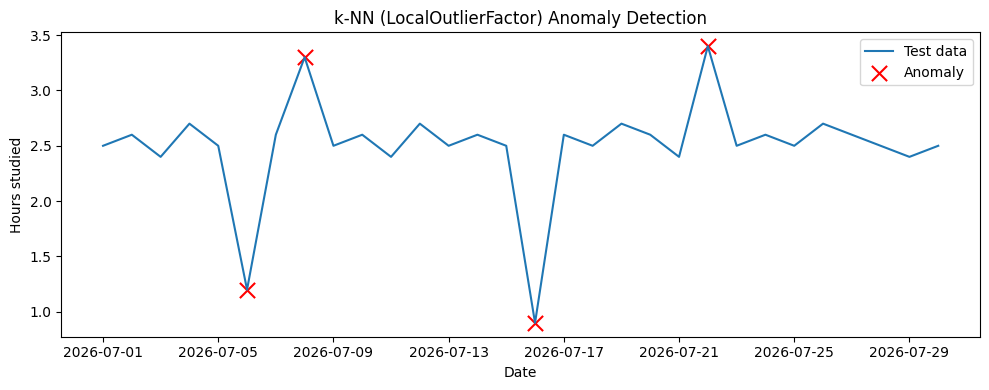

In [8]:
test_df["anomaly"] = knn_model.predict(test_df[["hours"]]) == -1
test_df["score"] = knn_model.decision_function(test_df[["hours"]])
print(test_df[["date", "hours", "score", "anomaly"]])
plt.figure(figsize=(10, 4))
plt.plot(test_df["date"], test_df["hours"], label="Test data")
plt.scatter(
    test_df.loc[test_df["anomaly"], "date"],
    test_df.loc[test_df["anomaly"], "hours"],
    s=120, marker="x", color="red", label="Anomaly"
)
plt.xlabel("Date")
plt.ylabel("Hours studied")
plt.title("k-NN (LocalOutlierFactor) Anomaly Detection")
plt.legend()
plt.tight_layout()
plt.show()